<a href="https://colab.research.google.com/github/utkarshg1/DL-2pm-4pm-Weekend/blob/main/SIP_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
def future_value(p:float, n:int , inflation_rate:float) -> float:
  return p * (1 + inflation_rate/100) ** n

In [20]:
def sip_estimator(m: float, n:int, r:float) -> float:
  i = r/1200
  x = (1 + i)**(n*12) - 1
  y = (x/i)*(1+i)
  return m/y

In [21]:
m = future_value(p=1_00_00_000, n=30, inflation_rate=8)
print(m)

100626568.8907345


In [22]:
sip = sip_estimator(m=m, n=30, r=12)
print(sip)

28506.806491753265


In [25]:
import numpy as np
size= 1_00_000
n = np.random.randint(low=25, high=36, size=size)
inflation_rate = np.random.normal(loc=8, scale=2/3, size=size)
r = np.random.normal(loc=12, scale=2/3, size=size)

In [26]:
m = future_value(p=1_00_00_000, n=n, inflation_rate=inflation_rate)
m

array([1.53079276e+08, 8.92723613e+07, 9.52284493e+07, ...,
       9.59180609e+07, 1.64447089e+08, 1.41407838e+08])

In [27]:
sips = sip_estimator(m=m, n=n, r=r)
sips

array([43273.39203132, 27512.32919223, 31339.49069185, ...,
       32885.13050397, 25654.74219419, 27708.35915212])

<Axes: ylabel='Count'>

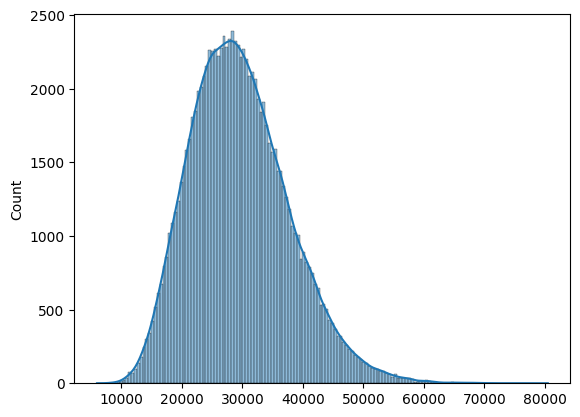

In [30]:
import seaborn as sns
sns.histplot(sips, kde=True)

In [32]:
log_sips = np.log(sips)

<Axes: ylabel='Count'>

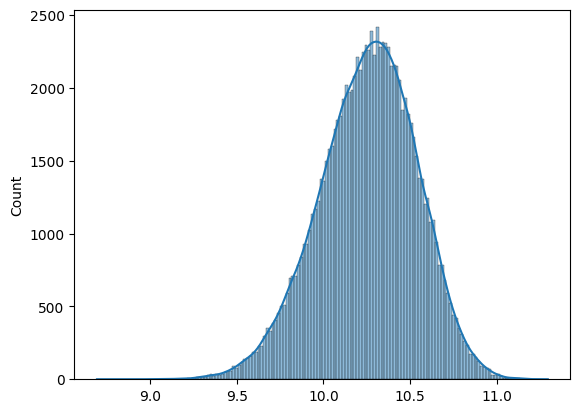

In [33]:
sns.histplot(log_sips, kde=True)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test statistic: 0.9959799559843895, p-value: 1.0046384040976466e-41
D'Agostino's K^2 statistic: 1113.5240616465321, p-value: 1.5897260110564642e-242


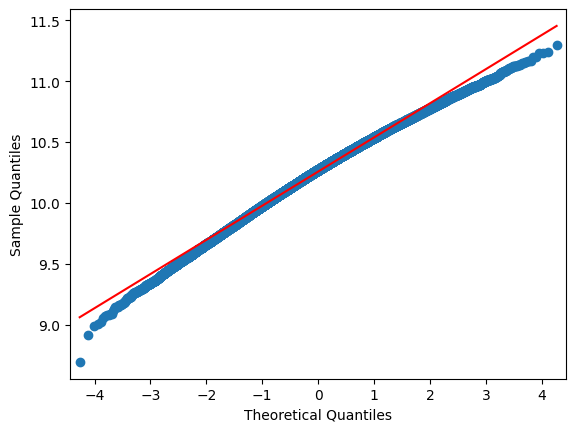

In [37]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 2: Check for normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(log_sips)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Alternatively, use D'Agostino's K^2 test for normality
k2_stat, p_value_k2 = stats.normaltest(log_sips)
print(f"D'Agostino's K^2 statistic: {k2_stat}, p-value: {p_value_k2}")

# Step 3: Q-Q plot for visual confirmation using statsmodels
sm.qqplot(log_sips, line='s')
plt.show()


In [39]:
%pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [40]:
from fitter import Fitter, get_common_distributions, get_distributions

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3.043478e-11,2695.135098,2723.673875,inf,0.004342,4.594336e-02
lognorm,4.585217e-11,2668.049991,2696.588768,inf,0.005467,5.048593e-03
norm,7.341314e-10,2964.597150,2983.623001,inf,0.034883,3.716082e-106
cauchy,4.045824e-09,2453.395594,2472.421445,inf,0.094542,0.000000e+00
rayleigh,6.913804e-09,2463.840661,2482.866512,inf,0.162170,0.000000e+00


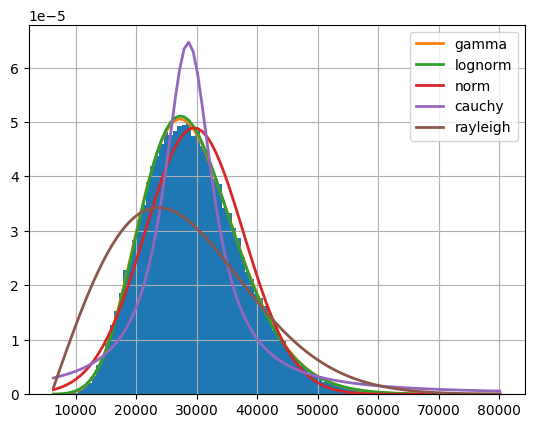

In [41]:
f = Fitter(sips,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [43]:
distr = f.get_best(method = 'sumsquare_error')["gamma"]

In [45]:
a = distr["a"]
loc = distr["loc"]
scale = distr["scale"]

In [46]:
mean = a*scale + loc
mean

29604.099386671485

In [48]:
np.median(sips)

28909.02868990461

In [49]:
mode = (a - 1)*scale + loc
mode

27285.755274617222

In [50]:
stdev = (a**(1/2))*scale
stdev

8167.243033084778

In [51]:
np.std(sips)

8153.497673800334

In [54]:
np.percentile(sips, 2.5)

15884.498742103639

In [55]:
np.percentile(sips, 97.5)

47448.49266291807

In [56]:
np.median(sips)

28909.02868990461

In [59]:
q1 = np.percentile(sips, 25)
q1

23719.290632480122

In [61]:
q3 = np.percentile(sips, 75)
q3

34668.90602807877

In [62]:
iqr = q3 -  q1
iqr

10949.615395598645

In [63]:
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

In [64]:
low

7294.867539082155

In [65]:
high

51093.32912147674

In [67]:
np.max(sips)

80496.6450365235

In [68]:
np.min(sips)

5963.74470267651